In [1]:
%reset -f
import sys
sys.path.insert(0, "..")
from wavhandler import Dataset
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report, make_scorer, log_loss
from utils_train import *
import deepdish as dd
from configs import DatasetConfiguration
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
dc1 = DatasetConfiguration(names=['Suzukii_RL']) #,'LG','Rodrigo','Suzukii_RL'])
dc2 = DatasetConfiguration(names=['Rodrigo'])
dc3 = DatasetConfiguration(names=['Pcfruit_sensor49'])

In [3]:
dc1.select(name='Suzukii_RL', species=['R','L'])#,'D. melanogaster'])
dc2.select(name='Rodrigo', species=['D. suzukii'])#,'D. melanogaster'])
dc3.select(name='Pcfruit_sensor49', species=['D. suzukii'])
dc1.read()
dc2.read()
dc3.read()

In [4]:
df1 = pd.concat([dc1.fnames, dc1.labels],axis=1)
df2 = pd.concat([dc2.fnames, dc2.labels],axis=1)
df3 = pd.concat([dc3.fnames, dc3.labels],axis=1)
df1.columns = ['names','labels']
df2.columns = ['names','labels']
df3.columns = ['names','labels']

In [5]:
from wavhandler import make_df_parallel
matR = make_df_parallel(names=df1[df1.labels=='R'].names.tolist(), setting='psdflt')

In [6]:
matL = make_df_parallel(names=df1[df1.labels=='L'].names.tolist(), setting='psdflt')

In [7]:
mat_rod = make_df_parallel(names=df2.names.tolist(), setting='psdflt')

In [8]:
mat49 = make_df_parallel(names=df3.names.tolist(), setting='psdflt')

# Using data collected in MeBioS: "RL" dataset

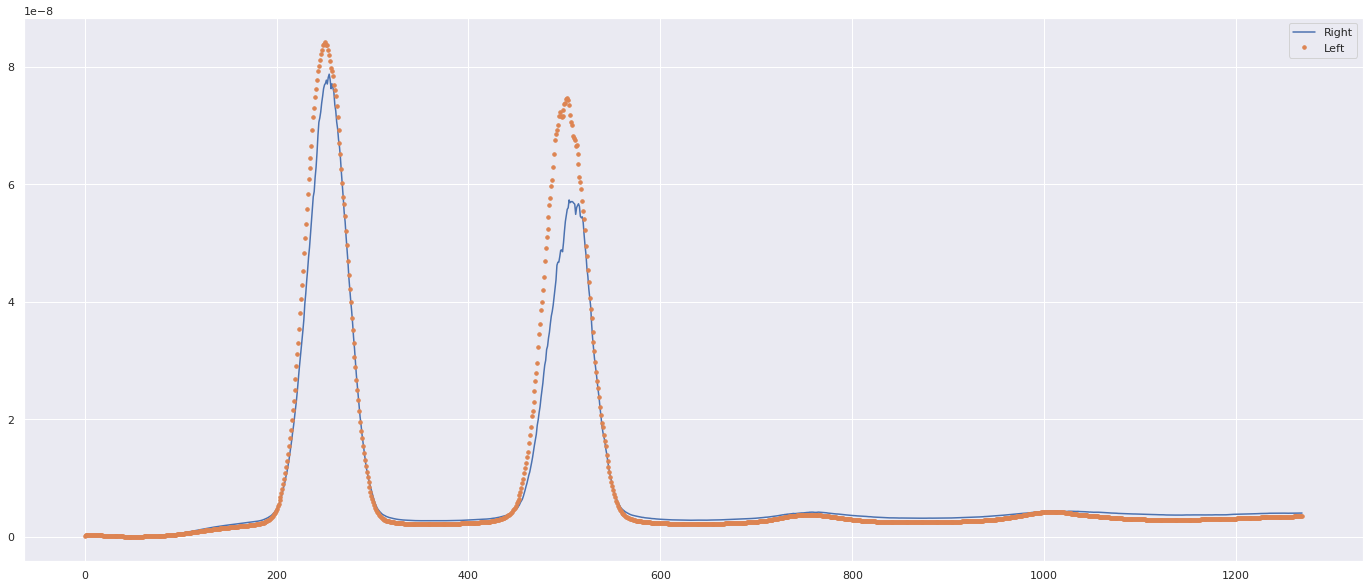

In [9]:
import seaborn as sns
sns.set()
plt.figure(figsize=(24,10))
start = 0
end = 1300
matR.iloc[:,start:end].median().plot()
matL.iloc[:,start:end].median().plot(style='.', ms=7)
plt.legend(['Right','Left'])

# Using data collected in MeBioS: "RL" dataset & Rodrigo's

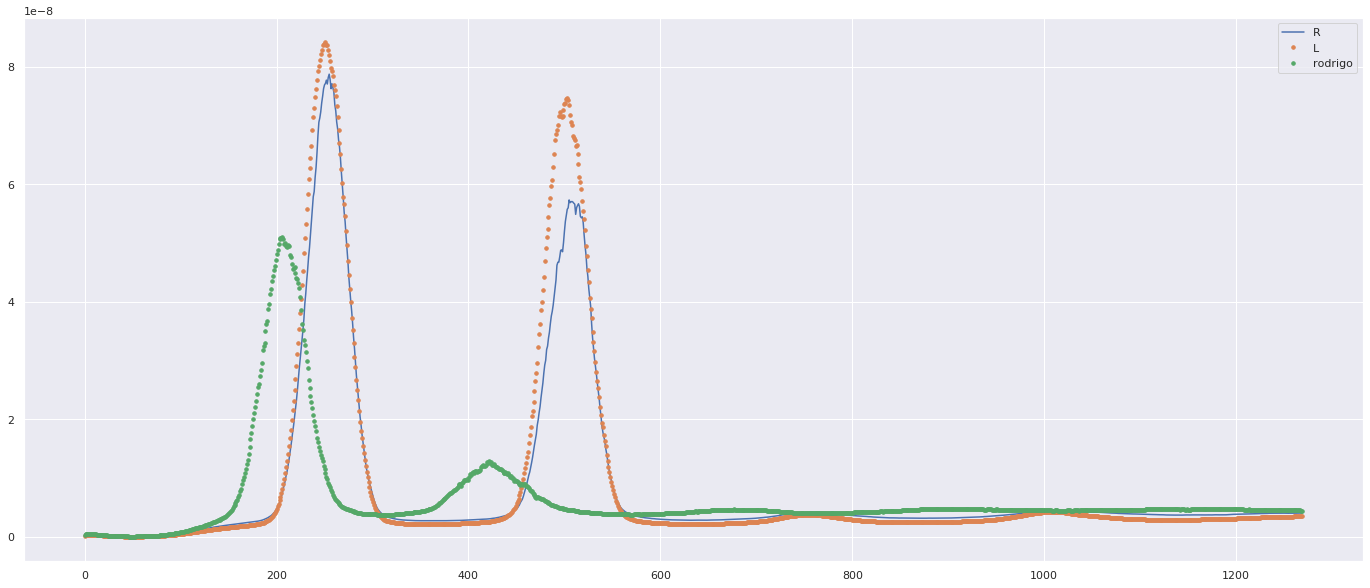

In [10]:
import seaborn as sns
sns.set()
plt.figure(figsize=(24,10))
start = 0
end = 1300
matR.iloc[:,start:end].median().plot()
matL.iloc[:,start:end].median().plot(style='.', ms=7)
mat_rod.iloc[:,start:end].median().plot(style='.', ms=7)
plt.legend(['R','L','rodrigo'])

# Using data collected in Pcfruit ('sensor49') and MeBioS ("RL" & Rodrigo's)

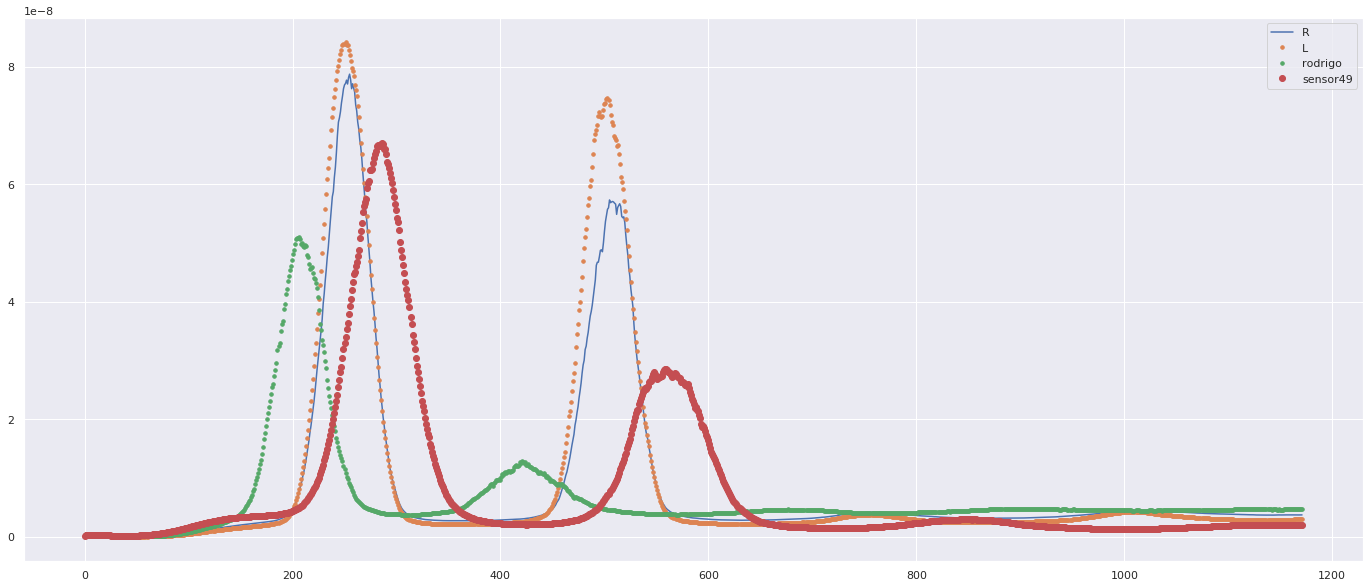

In [11]:
import seaborn as sns
sns.set()
plt.figure(figsize=(24,10))
start = 0
end = 1200
matR.iloc[:,start:end].median().plot()
matL.iloc[:,start:end].median().plot(style='.', ms=7)
mat_rod.iloc[:,start:end].median().plot(style='.', ms=7)
mat49.iloc[:,start:end].median().plot(style='.', ms=12)
plt.legend(['R','L','rodrigo','sensor49'])

# ANALYZING Pcfruit_sensor49

In [12]:
dconf = Dataset('Pcfruit_sensor49')
dconf.read(loadmat=False);
dconf.get_sensor_features(temp_humd=False)
sub = dconf.df_features

mel_test_dates = ['20191216','20191217','20191220','20191221','20191222','20191223',
                 '20191224','20191225','20191226','20191227','20191228','20191229',
                 '20191230','20191231','20200101','20200102','20200103','20200104',
                 '20200105','20200106','20200107','20200108','20200109','20200110',
                 '20200111','20200112','20200113','20200114','20200115','20200116',
                 '20200117','20200118','20200119']
mel_val_dates = [['20200131','20200201'],['20200307'],['20200313','20200314','20200315','20200316']]
suz_test_dates = ['20200207', '20200208']
suz_val_dates = [['20200209'],['20200214'],['20200219']]

Species: all.
Read 10264 filenames in 0.03 seconds.


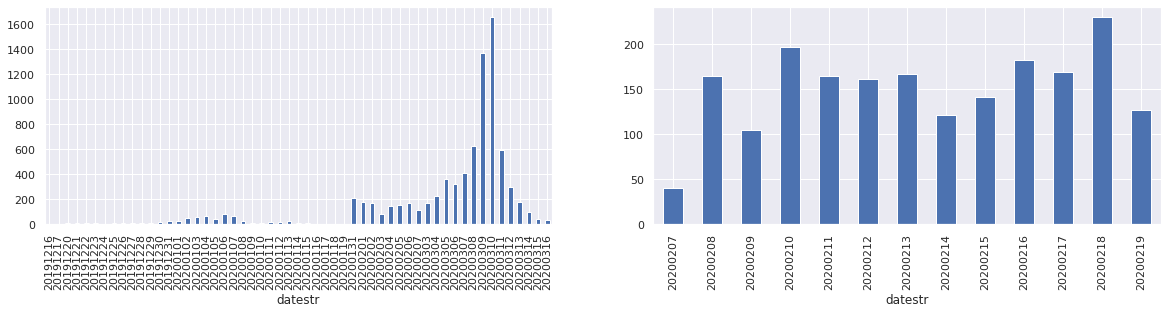

In [13]:
sub['y'] = dconf.df_features.filenames.apply(lambda x: x.split('/')[dconf.class_path_idx])
df_suz = sub[sub['y'] == 'D. suzukii']
df_mel = sub[sub['y'] == 'D. melanogaster']
plt.figure(figsize=(20,4))
plt.subplot(121); df_mel.groupby('datestr')['filenames'].count().plot(kind="bar")
plt.subplot(122); df_suz.groupby('datestr')['filenames'].count().plot(kind="bar")
# df_suz = df_suz[df_suz.datestr.isin(suz_test_dates)][['filenames','y','datestr']]
# df_mel = df_mel[df_mel.datestr.isin(mel_test_dates)][['filenames','y','datestr']]

In [14]:
df_mel_test = df_mel[df_mel.datestr.isin(mel_test_dates)][['filenames','y','datestr']]
df_mel_train = df_mel[~df_mel.datestr.isin(mel_test_dates)][['filenames','y','datestr']]
mat_test_mel = make_df_parallel(names=df_mel_test.filenames.tolist(), setting='psdflt')
mat_train_mel = make_df_parallel(names=df_mel_train.filenames.tolist(), setting='psdflt')

In [15]:
df_suz_test = df_mel[df_mel.datestr.isin(suz_test_dates)][['filenames','y','datestr']]
df_suz_train = df_mel[~df_mel.datestr.isin(suz_test_dates)][['filenames','y','datestr']]
mat_test_suz = make_df_parallel(names=df_suz_test.filenames.tolist(), setting='psdflt')
mat_train_suz = make_df_parallel(names=df_suz_train.filenames.tolist(), setting='psdflt')

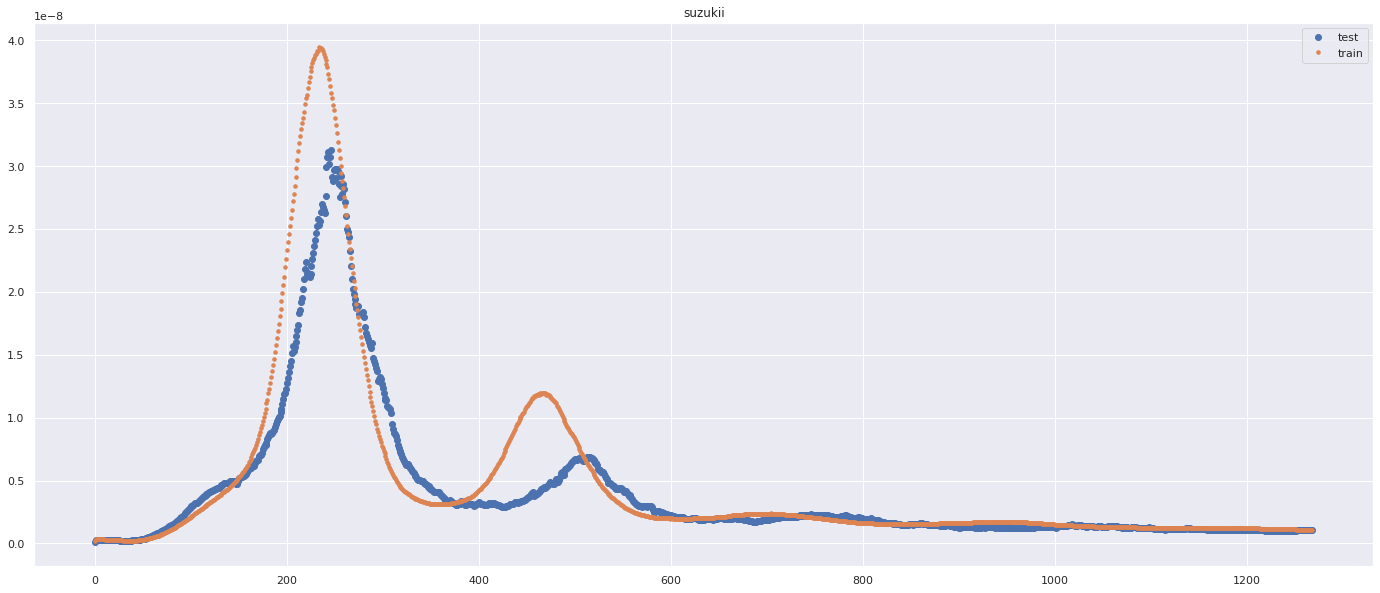

In [16]:
import seaborn as sns
sns.set()
plt.figure(figsize=(24,10)); plt.title('suzukii')
start = 0
end = 1300
mat_test_suz.iloc[:,start:end].median().plot(style='.', ms=12)
mat_train_suz.iloc[:,start:end].median().plot(style='.', ms=7)
plt.legend(['test','train'])

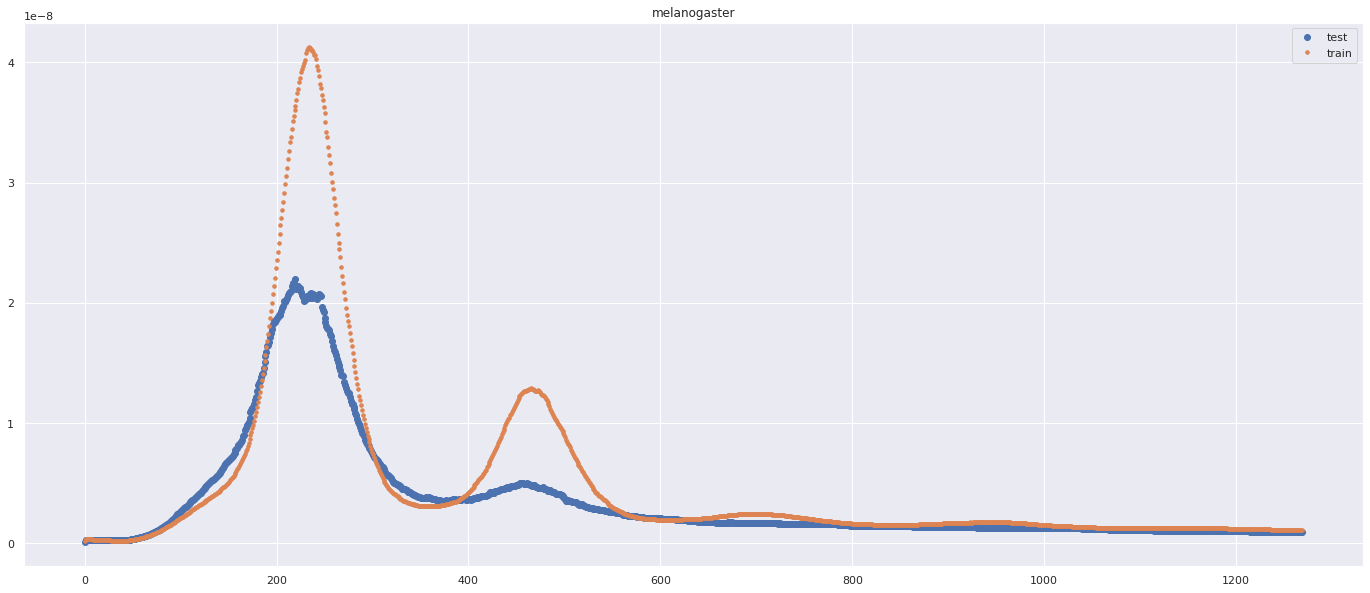

In [17]:
import seaborn as sns
sns.set()
plt.figure(figsize=(24,10)); plt.title('melanogaster')
start = 0
end = 1300
mat_test_mel.iloc[:,start:end].median().plot(style='.', ms=12)
mat_train_mel.iloc[:,start:end].median().plot(style='.', ms=7);
plt.legend(['test','train'])

#